In [1]:
from google.colab import files
from google.colab import drive
import pandas as pd
import io

uploaded = files.upload()

Saving adult.csv to adult (1).csv


In [0]:

#Importar o dataset

df_adult = pd.read_csv("adult.csv")

** - É necessário fazer o encoding das features **

In [3]:
import collections
from scipy import stats


missing_values = ["n/a", "na", "--", "?"]  #Array com os tipos de missing values
df_adult = pd.read_csv("adult.csv", na_values = missing_values) #carregar o dataset, reconhecendo os valores em falta
 
  
df_adult = df_adult.fillna({"workclass": "Private"})

df_adult = df_adult.fillna({"occupation": "Prof-specialty"}) #preencher os nan's da occupation com o tipo Prof-specialty pois é o mais comum

df_adult = df_adult.fillna({"native.country": "United-States"})


encoding = {"workclass":  {"Private":  22696, "Self-emp-not-inc": 2541, "Local-gov": 2093, "State-gov":1298, "Self-emp-inc": 1116, "Federal-gov": 960, "Without-pay": 14, "Never-worked": 7},
             "education": {"HS-grad": 10501, "Some-college": 7291, "Bachelors": 5355, "Masters": 1723, "Assoc-voc": 1382, "11th": 1175, 'Assoc-acdm': 1067 , "10th": 933, "7th-8th": 646, "Prof-school": 576, 
                           "9th": 514, "12th": 433, 
                           "Doctorate": 413, "5th-6th": 333, "1st-4th": 168, "Preschool": 51 },
            
             "marital.status":  {"Married-civ-spouse": 14976, "Never-married": 10683, "Divorced": 4443, "Separated":1025, "Widowed": 993,"Married-spouse-absent": 418, "Married-AF-spouse": 23 },
            
             "occupation": {"Prof-specialty": 4140, "Craft-repair": 4099, "Exec-managerial": 4066, "Adm-clerical": 3770, "Sales": 3650,"Other-service": 3295, "Machine-op-inspct": 2002, 
                            "Transport-moving":1597, "Handlers-cleaners": 1370,"Farming-fishing": 994, "Tech-support": 928, "Protective-serv": 649,"Priv-house-serv": 149, "Armed-Forces": 9  },
             
            "relationship": {"Husband": 13193, "Not-in-family": 8305, "Own-child": 5068, "Unmarried":3446, "Wife": 1568, "Other-relative": 981},
             
            "race": {"White": 27816, "Black": 3124, "Asian-Pac-Islander": 1039,"Amer-Indian-Eskimo": 311, "Other": 271}, 
            
             "native.country": {"United-States": 29170, "Mexico": 643, "Philippines": 198, "Germany": 137, "Canada": 121,"Puerto-Rico": 114, "El-Salvador": 106, 
                                "India": 100, "Cuba": 95,"England": 90, "Jamaica": 81, "South": 80,"China": 75, "Italy": 73, "Dominican-Republic": 70, "Vietnam": 67,"Guatemala": 64, "Japan": 62,
                                "Poland": 60,"Columbia": 59, "Taiwan": 51, 
                               "Haiti": 44, "Iran": 43,"Portugal": 37, "Nicaragua": 34, "Peru": 31, "Greece": 29, "France": 29,"Ecuador": 28, "Ireland": 24, "Hong": 20, 
                                "Trinadad&Tobago": 19, "Cambodia": 19,"Laos": 18, "Thailand": 18, "Yugoslavia": 16, "Outlying-US(Guam-USVI-etc)":14, "Honduras": 13,"Hungary": 13, 
                                "Scotland": 12, "Holand-Netherlands": 1}, 
            "income": {'<=50K': 0, '>50K': 1},

           }


#Converter as colunas para os valores inteiros

df_adult.replace(encoding, inplace=True)
df_adult = pd.concat([df_adult,pd.get_dummies(df_adult['sex'],prefix='')],axis=1).drop(['sex'],axis=1) # eliminar a coluna 'sex', depois de ser feito o one hot encoding
df_adult.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income,_Female,_Male
0,90,22696,77053,10501,9,993,4140,8305,27816,0,4356,40,29170,0,1,0
1,82,22696,132870,10501,9,993,4066,8305,27816,0,4356,18,29170,0,1,0
2,66,22696,186061,7291,10,993,4140,3446,3124,0,4356,40,29170,0,1,0
3,54,22696,140359,646,4,4443,2002,3446,27816,0,3900,40,29170,0,1,0
4,41,22696,264663,7291,10,1025,4140,5068,27816,0,3900,40,29170,0,1,0
5,34,22696,216864,10501,9,4443,3295,3446,27816,0,3770,45,29170,0,1,0
6,38,22696,150601,933,6,1025,3770,3446,27816,0,3770,40,29170,0,0,1
7,74,1298,88638,413,16,10683,4140,981,27816,0,3683,20,29170,1,1,0
8,68,960,422013,10501,9,4443,4140,8305,27816,0,3683,40,29170,0,1,0
9,41,22696,70037,7291,10,10683,4099,3446,27816,0,3004,60,29170,1,0,1


************************************************************************************
**  Modelo  Decision Tree**

- Com previsão.





In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets, tree, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # use 'accuracy_score' to calculate the accuracy of the predicted labels.
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics  



x = df_adult.drop('income', axis=1)  
target = df_adult['income'] 

'''
                               Split training set/test set, com 20% para o teste sendo que os restantes 80% são para treino
'''
  
[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(x, target, test_size=0.20, random_state = 100) #random_state 1000


model = tree.DecisionTreeClassifier()

model.fit(features_train, classes_train)



score_train = model.score(features_train, classes_train) # obter o score das features de treino
score_test = model.score(features_test, classes_test) # obter o score das features de teste


#########################################################################################
#########################################################################################

'''
                              Previsão de valores
'''

prever = model.predict(features_test)   


#########################################################################################
#########################################################################################


print('\n\tDecision Tree')
print('==============================')
print("score_train:", score_train) 
print("score_test:", score_test) 
print("Precisão: %s%%" % (100*accuracy_score(classes_test, prever)))
print('==============================')





	Decision Tree
score_train: 0.9999616093366094
score_test: 0.8111469368954399
Precisão: 81.114693689544%


**********************************************************************
**Análise dos resultados:**
Adicionando mais dados(random_state = 1000 por exemplo) verifcamos que o score train aumenta, mas o score test e a precisão diminuem.
**************************************************************

*******************************************************************************
**Curva de aprendizagem**
*******************************************************************************

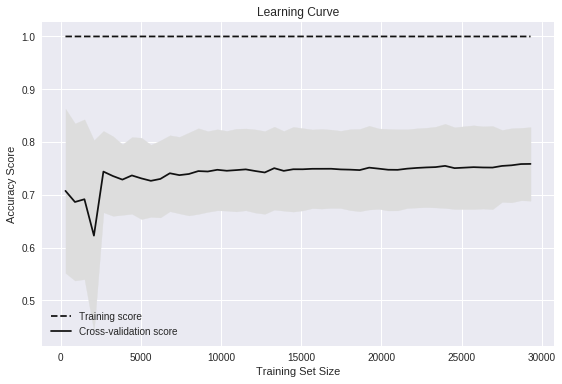

In [8]:

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Criar o cross validation para o training e test scores para varios tamanhos de training sets 
train_sizes, score_train, score_test = learning_curve(DecisionTreeClassifier(), 
                                                        x, 
                                                        target,
                                                        # Número de dobras(flods) na CV(cross validation)
                                                        cv=10,
                                                        # Métrica de avaliação
                                                        scoring='accuracy',
                                                        # Use todos os núcleos do computador
                                                        n_jobs=-1, 
                                                        # 50 tamanhos diferentes para o training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Fazer média e desvio padrão do training set
train_mean = np.mean(score_train, axis=1)
train_std = np.std(score_train, axis=1)

# Fazer média e desvio padrão do test set scores
test_mean = np.mean(score_test, axis=1)
test_std = np.std(score_test, axis=1)

# Desenhar as linhas
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Criar o plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**Matriz de confusão (Decision Tree)**


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

#passar para o método o valor das classes reais(classes_test) e os valores que o classificador preve


#print(classification_report(features_test,prever))

print(confusion_matrix(classes_test, model.predict((features_test))))

#imprimir a matriz

print(pd.crosstab(classes_test, model.predict(features_test),
                  rownames=['Valor Verdadeiro'], colnames=['Previsão'], margins = True))





[[4301  619]
 [ 599  994]]
Previsão             0     1   All
Valor Verdadeiro                  
0                 4301   619  4920
1                  599   994  1593
All               4900  1613  6513


***********************************************************************************************
**Analisar os resultados da matriz de confusão**

     -    A coluna all é a soma das instâncias de cada classe.


*   O modelo classificou 4301 instâncias como 0 de forma correta.
*   O modelo classificou 600 instâncias como 1, de forma incorreta, ou seja, que na realidade eram 0.
*   O modelo classificou 619 instâncias como 0, de forma incorreta, ou seja, que na realidade eram 1.
*   O modelo classificou 993 instâncias como 1, de forma correta.

*********************************************************************************************************

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

"mostrar a precisão, recall, f1 e o suporte"
print(classification_report(classes_test, prever))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4920
           1       0.62      0.62      0.62      1593

   micro avg       0.81      0.81      0.81      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.81      0.81      0.81      6513



- Neste caso o grau de relevância é equivalente
********************************************************************************

**********************************************************************************************************


**Curva  de precisão e Recall (Decision Tree)**

f1=0.620 auc=0.666 precisao Media=0.476


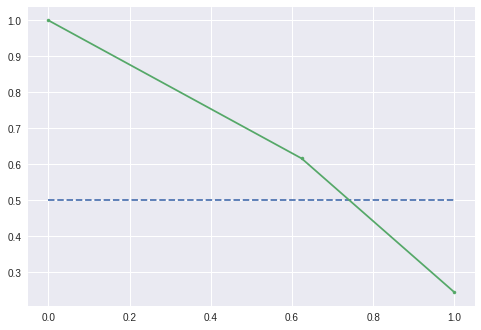

In [11]:

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot


#Prever as probabilidades
preverProb = model.predict_proba(features_test)   



#Guardar a probabilidade para os valores positivos apenas
preverProb = preverProb[:, 1]



#Calcular a curva de precisão e recall
precision, recall, thresholds = precision_recall_curve(classes_test, preverProb)


#fazer o f1 score.. f1 é uma média ponderada da precision e da recall, em que os dois contribuem de forma equivalente. 
#o f1 atinge o seu melhor score no 1 e o seu pior no 0.
f1 = f1_score(classes_test, prever) 


# calcular a Area Under the Curve(AUC) para a precisão e recall
auc = auc(recall, precision)


#  Calcular os resultados(score) médios da precisao
ap = average_precision_score(classes_test, preverProb)
print('f1=%.3f auc=%.3f precisao Media=%.3f' % (f1, auc, ap))



"Precision: A measure of a classifiers exactness."
"Recall: A measure of a classifiers completeness"


################################################################################################################
################################################################################################################
'''
                                                          Plot
'''


# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')


# plot da roc curve para o  model
pyplot.plot(recall, precision, marker='.')


# Mostrar o plot
pyplot.show()



In [0]:

from sklearn.metrics import precision_recall_fscore_support

#mostrar os valores da precisão, recall e f1
print(precision_recall_fscore_support(classes_test, preverProb, average='weighted'))


(0.8127630003557963, 0.8119146322739137, 0.8123293102159381, None)


**************************************************************************************************************
** Modelo Random Forest **

- Com previsão

In [34]:
'''
              modelo Random Forest
'''




model = RandomForestClassifier(n_estimators=100)
model.fit(features_train, classes_train)

#Fazer a previsão

previsaoRF = model.predict(features_test)


#df = pd.DataFrame({'Valor Real': classes_test, 'Previsão': previsaoRF}) 
#df se quisermos ver uma tabela com o valor real e a previsao

score_train = model.score(features_train, classes_train) # obter o score das features de treino
score_test = model.score(features_test, classes_test) # obter o score das features de teste


print('\n\tRandom Forest')
print('==============================')
print("score_train:", score_train)
print("score_test:", score_test)
print("Precisão: %s%%" % (100*accuracy_score(classes_test, previsaoRF)))
print('==============================')







	Random Forest
score_train: 0.9999616093366094
score_test: 0.8541378780899739
Precisão: 85.41378780899738%


**********************************************************************
**Análise dos resultados:**
Adicionando mais dados(random_state = 1000 por exemplo) verifcamos que o score train, score test e a precisão aumentam minimamente.
**************************************************************

*************************************************************************************************************************************************************************************************************
**CURVA DE APRENDIZAGEM**

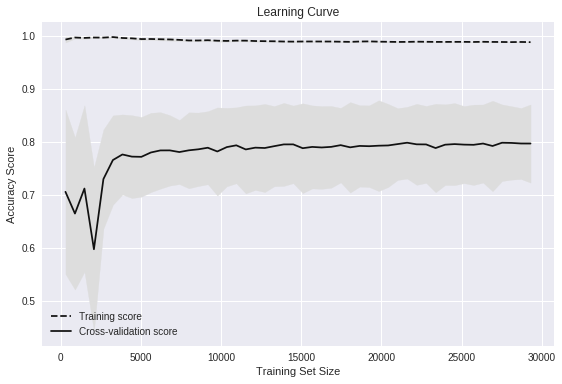

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Criar o cross validation para o training e test scores para varios tamanhos de training sets 
train_sizes, score_train, score_test = learning_curve(RandomForestClassifier(), 
                                                        x, 
                                                        target,
                                                        # Número de dobras(flods) na CV(cross validation)
                                                        cv=10,
                                                        # Métrica de avaliação
                                                        scoring='accuracy',
                                                        # Usar todos os núcleos do computador
                                                        n_jobs=-1, 
                                                        # 50 tamanhos diferentes para o training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))




# Fazer meádia e desvio padrão do training set 
train_mean = np.mean(score_train, axis=1)
train_std = np.std(score_train, axis=1)

# Fazer meádia e desvio padrão do test set 
test_mean = np.mean(score_test, axis=1)
test_std = np.std(score_test, axis=1)

# Desenhar as linhas
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Fazer o plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

********************************************************************************************************************************************************************************************************************

**Matriz de confusão (Random Forest)**

In [21]:
from sklearn.metrics import confusion_matrix

#passar para o método o valor das classes reais(classes_test) e os valores que o classificador preve

print(confusion_matrix(classes_test, model.predict((features_test))))

#imprimir a matriz

print(pd.crosstab(classes_test, model.predict(features_test),
                  rownames=['Valor Verdadeiro'], colnames=['Previsão'], margins = True))





[[4583  337]
 [ 603  990]]
Previsão             0     1   All
Valor Verdadeiro                  
0                 4583   337  4920
1                  603   990  1593
All               5186  1327  6513


***************************************************************************************************************************************************************************************************************

**Analisar os resultados da matriz de confusão**

     -    A coluna all é a soma das instâncias de cada classe.


*   O modelo classificou 4577 instâncias como 0 de forma correta.
*   O modelo classificou 599 instâncias como 1, de forma incorreta, ou seja, que na realidade eram 0.
*   O modelo classificou 343 instâncias como 0, de forma incorreta, ou seja, que na realidade eram 1.
*   O modelo classificou 994 instâncias como 1, de forma correta.


*********************************************************************************************************************************************************************************************************************************************************************************************************************



**Para podermos ter uma melhor noção da precision, recall e f1:**

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

"mostrar a precisão, recall, f1 e o suporte"
print(classification_report(classes_test, previsaoRF))


"Ou"

#mostrar os valores da precisão, recall e f1
#print(precision_recall_fscore_support(classes_test, preverProb, average='weighted'))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4920
           1       0.75      0.62      0.68      1593

   micro avg       0.86      0.86      0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



************************************************************************************************************************************************************************************************************


**Curva  de precisão e Recall (Random Forest)**

f1=0.678 auc=0.666 ap=0.784


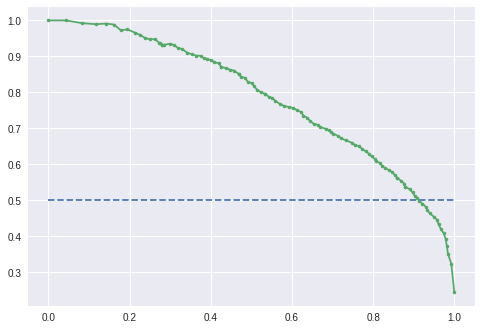

In [23]:
#Prever as probabilidades para o random forest
preverProb_RF = model.predict_proba(features_test)   



#Guardar a probabilidade para os valores positivos apenas
preverProb_RF =preverProb_RF[:, 1]


# calcular a Area Under the Curve(AUC) para a precisão e recall
precision, recall, thresholds = precision_recall_curve(classes_test, preverProb_RF)


#fazer o f1 score.. f1 é uma média ponderada da precision e da recall, em que os dois contribuem de forma equivalente.
#o f1 atinge o seu melhor score no 1 e o seu pior no 0.
f1 = f1_score(classes_test, previsaoRF)



#  Calcular os resultados(score) médios da precisao
ap = average_precision_score(classes_test, preverProb_RF)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))


################################################################################################################
################################################################################################################
'''
                                                          Plot
'''

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')


# plot da roc curve para o model
pyplot.plot(recall, precision, marker='.')


# Mostrar o plot
pyplot.show()

**Comparar os dois modelos: **


  - Podemos verificar que o modelo Random Forest funciona melhor, obtendo melhores resultados de teste. E tendo uma maior precisão.

**************************************************************************************************************************************************************************************************************************************************************************************************************************



*************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

**Desafio:**
- Usar outro modelo/classificador

**Explicação do classificador**


1.  Inicialmente é selecionado um conjunto random.

2.   O modelo é treinado iterativamente selecionando o conjunto com base na previsão precisa do anterior

3.  É atribuído o maior peso a observações classificadas como incorretas de modo a que, na próxima iteração, essas observações obterão alta probabilidade de classificação.

4.   Para além disto, é atribuído o peso ao classificador em cada iteração de acordo com a precisão do classificador. O classificador mais preciso terá um peso maior

5.  Este processo é repetido até que os dados completos caibam sem qualquer erro ou até que sejam alcançados para o número máximo de estimadores especificado.

6.  Para classificar, é feito um "vote" em todos os algoritmos criados.


7.   AdaBoost usa Decision Tree Classifier como classificador.











In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

####################################################################################################################################3

# Criar um objeto do classificador 
abc = AdaBoostClassifier(n_estimators=1000,
                         learning_rate=1)

#  Treinar o classificador adaboost
abc.fit(features_train, classes_train)

#Predict the response for test dataset 
pred = abc.predict(features_test)


score_train = abc.score(features_train, classes_train) # obter o score das features de treino
score_test = abc.score(features_test, classes_test) # obter o score das features de teste


print('\n\tAdaBoost Classifier')
print('==============================')
print("score_train:", score_train)
print("score_test:", score_test)
print("Precisão:",metrics.accuracy_score(classes_test, pred)) #quantas vezes o classificador acerta(?)




	AdaBoost Classifier
score_train: 0.8743473587223587
score_test: 0.8728696453247351
Precisão: 0.8728696453247351


**********************************************************************
**Análise dos resultados:**
Adicionando mais dados(n_estimators = 1000 por exemplo) verifcamos que o score train, score test e a precisão aumentam .
**************************************************************

**Visualizar os dados através de um heat map**

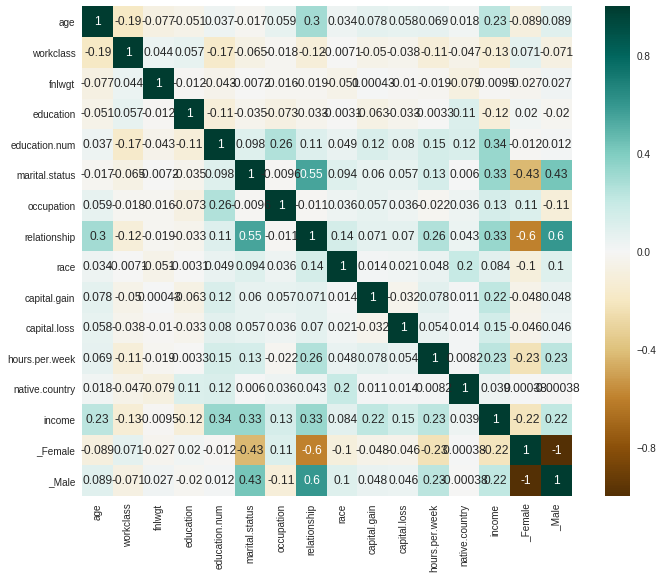

In [29]:
import seaborn as sns
hmap = df_adult.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

**Tentar perceber a influência que as features têm no target**

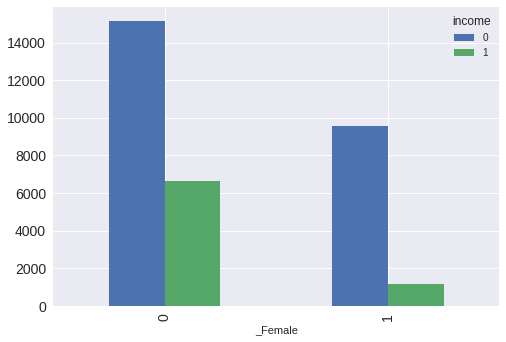

In [0]:
df_adult.groupby(["income","_Female"]).size().unstack("income").plot(kind="bar",fontsize=14)

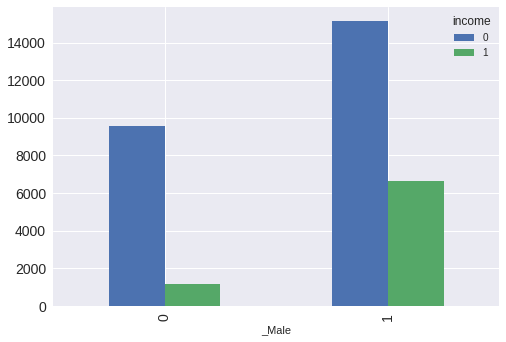

In [0]:
df_adult.groupby(["income","_Male"]).size().unstack("income").plot(kind="bar",fontsize=14)

**Análise**
- Conseguimos perceber que os Homens recebem mais do que as mulheres.

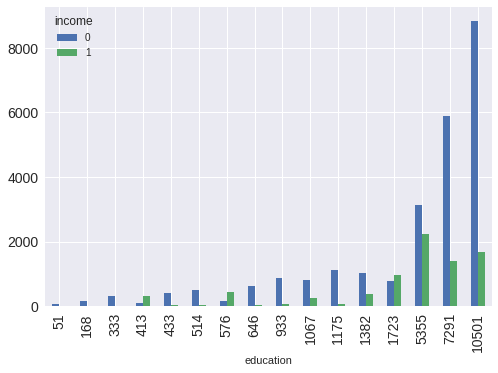

In [0]:
df_adult.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=14)

**Análise**
- Analisando o gráfico podemos ver que, em termos de nível de educação escolar  as pessoas que recebem mais são as que têm um Bacharelato(Bachelors).

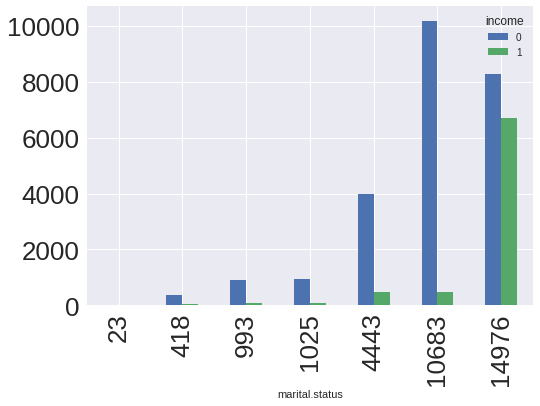

In [0]:
df_adult.groupby(["income","marital.status"]).size().unstack("income").plot(kind="bar",fontsize=26)

**Análise**

- Em termos de estado de casamento podemos ver que as pessoas que recebem mais são as que se encontram em um estado de:
Married-civ-spouse